In [ ]:

import random
import copy
import matplotlib.pyplot as plt
import numpy as np
import copy

In [ ]:
# Função para processar o grafo a partir de um arquivo de entrada
def processar_grafo(arquivo):
    with open(arquivo, "r") as grafo:
        num_vertices = int(grafo.readline())
        matriz_adj = [[0] * num_vertices for _ in range(num_vertices)]

        # Preenche a matriz de adjacência
        for i in range(num_vertices):
            linha = grafo.readline().split()
            for j in range(num_vertices):
                matriz_adj[i][j] = int(linha[j])

        # Cria uma lista de adjacência a partir da matriz
        lista_adj = {}
        for i in range(num_vertices):
            lista_adj[i] = []
            for j in range(num_vertices):
                if matriz_adj[i][j] == 1:
                    lista_adj[i].append(j)

        return matriz_adj, lista_adj, num_vertices

# Algoritmo de Karger para encontrar o corte mínimo em um grafo
def karger_algorithm(lista_adj):
    while len(lista_adj) > 2:
        vertice1 = random.choice(list(lista_adj.keys()))
        vertice2 = random.choice(lista_adj[vertice1])
        contrair(lista_adj, vertice1, vertice2)
    return len(lista_adj[list(lista_adj.keys())[0]])

# Função para contrair dois vértices em um grafo
def contrair(lista_adj, vertice1, vertice2):
    lista_adj[vertice1].extend(lista_adj[vertice2])
    del lista_adj[vertice2]

    for vertice in lista_adj:
        lista_adj[vertice] = [vertice1 if x == vertice2 else x for x in lista_adj[vertice]]

    while vertice1 in lista_adj[verti1ce1]:
        lista_adj[vertice1].remove(vertice1)

# Executa o algoritmo de Karger múltiplas vezes
def karger_n_times(lista_adj, n):
    minimo = float("inf")

    for _ in range(n):
        lista_adj_copy = copy.deepcopy(lista_adj)
        minimo_atual = karger_algorithm(lista_adj_copy)

        if minimo_atual < minimo:
            minimo = minimo_atual

    return minimo

# Algoritmo ingênuo para encontrar o corte mínimo em um grafo
def naive_algorithm(lista_adj):
    vertices = list(lista_adj.keys())
    tamanho = random.randint(1, len(vertices) - 1)
    vertices_escolhidos = set(random.sample(vertices, tamanho))
    corte = 0

    for vertice in vertices_escolhidos:
        for vizinho in lista_adj[vertice]:
            if vizinho not in vertices_escolhidos:
                corte += 1

    return corte

# Executa o algoritmo ingênuo múltiplas vezes
def randomizada_naive_n_times(lista_adj, n):
    minimo = float("inf")

    for _ in range(n):
        minimo_atual = naive_algorithm(lista_adj)
        minimo = min(minimo, minimo_atual)

    return minimo

def calcular_probabilidades(arquivo_grafo, arquivo_saida, numero_de_execucoes, incremento_volume, tolerancia):

    lista_adj = processar_grafo(arquivo_grafo)[1]


    with open(arquivo_saida, 'r') as arquivo:
        valor_esperado = int(arquivo.readline())

    probabilidades_karger = []
    probabilidades_naive = []
    lista_volume = []

    volume = 2

    probabilidade_karger = 0
    probabilidade_naive = 0

    while(probabilidade_karger < tolerancia or volume <= 50):
      probabilidade_karger = 0
      probabilidade_naive = 0
      lista_volume.append(volume)
      for i in range(numero_de_execucoes):
          # Karger
          cortes_karger = []
          for _ in range(volume):
              lista_adj_copy = copy.deepcopy(lista_adj)
              corte = karger_algorithm(lista_adj_copy)
              cortes_karger.append(1 if corte == valor_esperado else 0)

          if 1 in cortes_karger:
            probabilidade_karger += 1

          cortes_naive = []
          for _ in range(volume):
              corte_naive = randomizada_naive_n_times(lista_adj, 1)
              cortes_naive.append(1 if corte_naive == valor_esperado else 0)

          if 1 in cortes_naive:
            probabilidade_naive += 1


      volume += incremento_volume

      probabilidades_karger.append(probabilidade_karger / numero_de_execucoes)
      probabilidades_naive.append(probabilidade_naive / numero_de_execucoes)

    return lista_volume, probabilidades_karger, probabilidades_naive



def plotar_graficos(n_inter, probabilidades_karger, probabilidades_naive):
    # Criando um único gráfico
    plt.figure(figsize=(8, 4))

    # Plotando Karger
    plt.plot(n_inter, probabilidades_karger, label='Karger', color='blue', linestyle="-")

    # Plotando Naive
    plt.plot(n_inter, probabilidades_naive, label='Naive', color='goldenrod', linestyle="-")

    plt.xlabel('Número de Iterações')
    plt.ylabel('Probabilidade')
    plt.title('Probabilidade de Corte Mínimo Esperado Para X Iterações')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

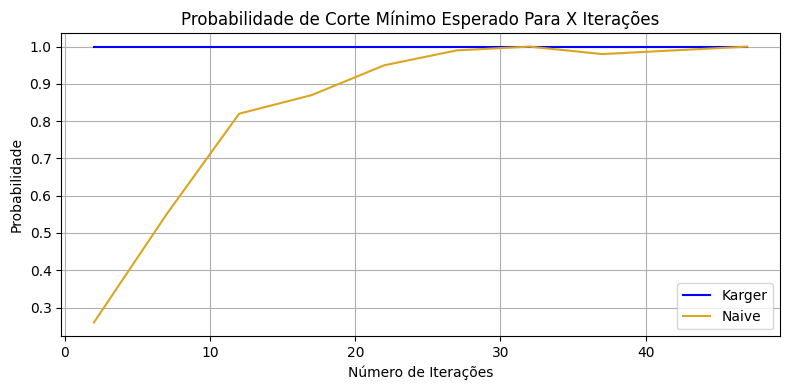

In [ ]:
arquivo_grafo = 'graph_type1_1'
arquivo_saida = 'graph_type1_1_OUT'

numero_de_execucoes = 100
incremento_volume = 5
tolerancia = 1.1

n_inter, probabilidades_karger, probabilidades_naive = calcular_probabilidades(arquivo_grafo, arquivo_saida, numero_de_execucoes, incremento_volume, tolerancia)

plotar_graficos(n_inter, probabilidades_karger, probabilidades_naive)


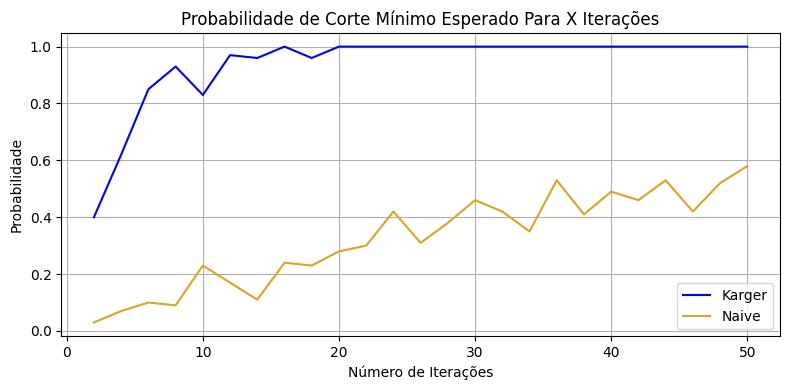

In [ ]:
arquivo_grafo = 'graph_type1_2'
arquivo_saida = 'graph_type1_2_OUT'

numero_de_execucoes = 100
incremento_volume = 2
tolerancia = 1.1

n_inter, probabilidades_karger, probabilidades_naive = calcular_probabilidades(arquivo_grafo, arquivo_saida, numero_de_execucoes, incremento_volume, tolerancia)

plotar_graficos(n_inter, probabilidades_karger, probabilidades_naive)

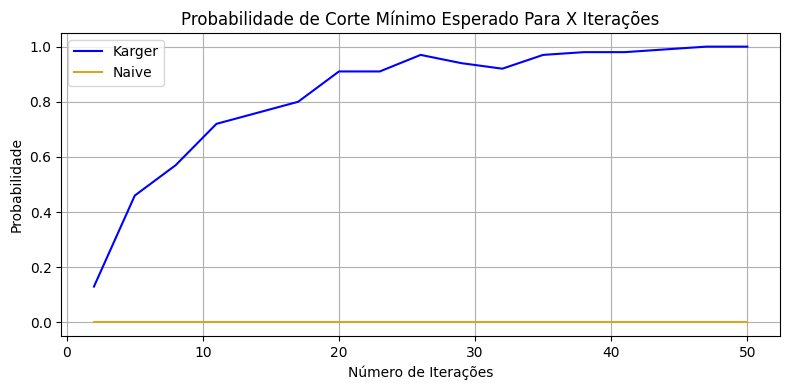

In [ ]:
arquivo_grafo = 'graph_type2_2'
arquivo_saida = 'graph_type2_2_OUT'

numero_de_execucoes = 100
incremento_volume = 3
tolerancia = .98

n_inter, probabilidades_karger, probabilidades_naive = calcular_probabilidades(arquivo_grafo, arquivo_saida, numero_de_execucoes, incremento_volume, tolerancia)

plotar_graficos(n_inter, probabilidades_karger, probabilidades_naive)